In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split

# Todo: remove once have pip install
import sys  
sys.path.insert(0, 'C:\python_projects\RotationFeatures_project\RotationFeatures')
from RotationFeatures import RotationFeatures, GraphTwoDimTree # todo: fix once have pip install

np.random.seed(0)

## Constants used to control the examples shown

In [3]:
# Set to one of: "iris", "breast_cancer", or "wine"
DATASET_TESTED = "iris"

## Method to load data

In [4]:
def get_iris():
    iris = load_iris()
    X, y = iris.data, iris.target
    X = pd.DataFrame(X, columns=iris['feature_names'])
    y = pd.Series(y)
    return X, y

def get_breast_cancer():
    X, y = load_breast_cancer(return_X_y=True, as_frame=True)
    return X,y

def get_wine():
    X, y = load_wine(return_X_y=True, as_frame=True)
    return X,y

## Example using RotationFeatures with a decision tree on the Iris dataset

In [5]:
if DATASET_TESTED == "iris":
    X,y = get_iris()
elif DATASET_TESTED == "breast_cancer":
    X,y = get_breast_cancer()
elif DATASET_TESTED == "wine":
    X,y = get_wine()
else:
    assert False, "Not a valid test dataset"

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
rota = RotationFeatures(degree_increment=30)
rota.fit(X_train)
X_train_extended = rota.transform(X_train)

#!!!!!!!!!!!!!!!!!!!!!!!!!!
# todo: seems to be bug with this line -- issue if pass pd df ?
#X_train_extended = pd.DataFrame(X_train_extended, index=X_train.index)
X_test_extended = rota.transform(X_test)

dt = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_extended,y_train)
y_pred = dt.predict(X_test_extended)

## Presenting the features generated

In [6]:
display(X_train_extended)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),R_0,R_1,R_2,R_3,R_4,R_5,...,R_14,R_15,R_16,R_17,R_18,R_19,R_20,R_21,R_22,R_23
61,5.9,3.0,4.2,1.5,0.176567,0.583066,-0.138622,0.593234,0.117659,0.685098,...,-0.254542,0.628085,0.069177,0.713515,-0.296848,0.652511,0.171209,0.772423,-0.237940,0.754542
92,5.8,2.6,4.0,1.2,0.235844,0.424840,-0.008173,0.485844,0.110844,0.641346,...,-0.308013,0.466506,-0.012660,0.521928,-0.271928,0.445673,0.203846,0.646928,-0.146928,0.662179
112,6.8,3.0,5.5,2.1,0.393073,0.708066,-0.013622,0.809740,0.222096,1.004207,...,-0.448651,0.740154,-0.055823,0.930021,-0.513355,0.777511,0.240318,1.100998,-0.342377,1.073651
2,4.7,3.2,1.3,0.2,-0.153775,0.488568,-0.377457,0.346225,0.078984,0.085419,...,0.220137,0.450254,0.412179,0.286084,0.213916,0.453846,0.009030,0.053326,-0.018843,0.050696
141,6.9,3.1,5.1,2.3,0.396296,0.758039,-0.035817,0.854629,0.280635,0.958370,...,-0.368092,0.741756,-0.061405,1.023023,-0.564690,0.855262,0.138926,1.138684,-0.449029,1.055592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,4.9,3.1,1.5,0.1,-0.084829,0.480262,-0.313595,0.373504,0.109855,0.143059,...,0.169441,0.431411,0.396928,0.229167,0.229167,0.396928,0.059726,0.034483,0.034483,0.059726
103,6.3,2.9,5.6,1.8,0.293625,0.602537,-0.046982,0.668625,0.093194,0.949694,...,-0.484416,0.712691,-0.029407,0.800935,-0.425935,0.678926,0.317750,1.001366,-0.225504,1.026083
67,5.8,2.7,4.1,1.0,0.215011,0.460924,-0.044257,0.506677,0.102223,0.656278,...,-0.302111,0.511211,0.065091,0.470593,-0.178926,0.440091,0.260444,0.583380,-0.066139,0.635444
117,7.7,3.8,6.7,2.2,0.442913,1.121741,-0.177297,1.192913,0.335154,1.308385,...,-0.461162,1.132278,0.212019,1.132772,-0.382772,1.087019,0.398662,1.240531,-0.275014,1.273662


## Example Visualizing a Single Node

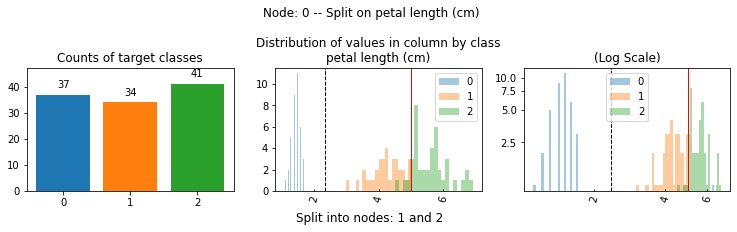

In [7]:
tree_viewer = GraphTwoDimTree(tree=dt, 
                              X_orig=X_train, 
                              X_extended=X_train_extended, 
                              y=y_train,
                              rota=rota)

tree_viewer.graph_node(node_idx=0, 
                       row=X_train_extended.iloc[10], 
                       show_log_scale=True)

## Example Visualizing the Decision Path for a Single Prediction

Decision Path: [0 2 4 5 6]


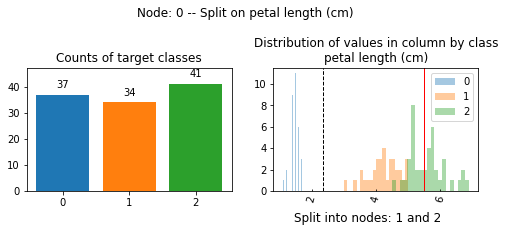

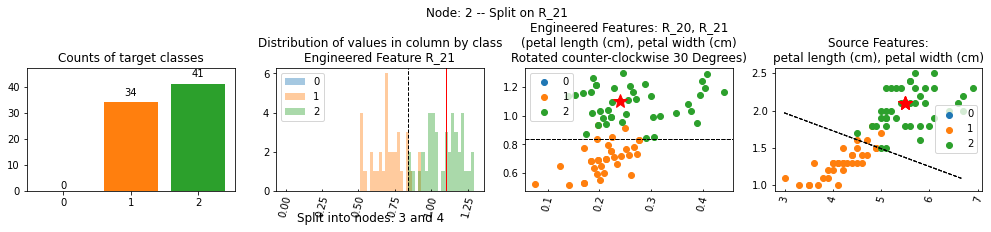

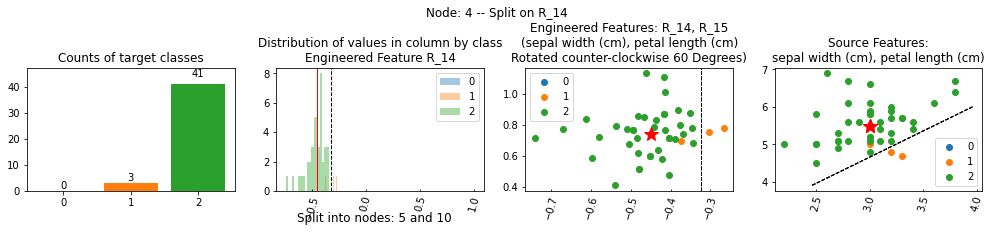

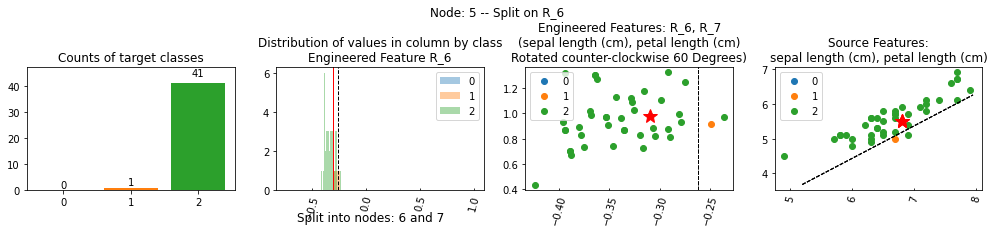

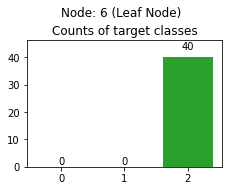

In [8]:
tree_viewer.graph_decision_path(row=X_train_extended.iloc[2], show_log_scale=False)

## Example Showing Incorrect Predictions

Number of rows: 38. Number of incorrect: 1. Percent incorrect: 3


****************************************************************
Displaying decision path for row 83. Predicted: 2. Actual: 1
****************************************************************
Decision Path: [0 2 4 5 6]


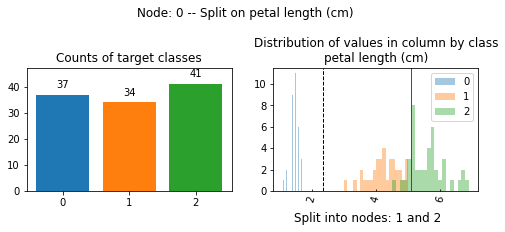

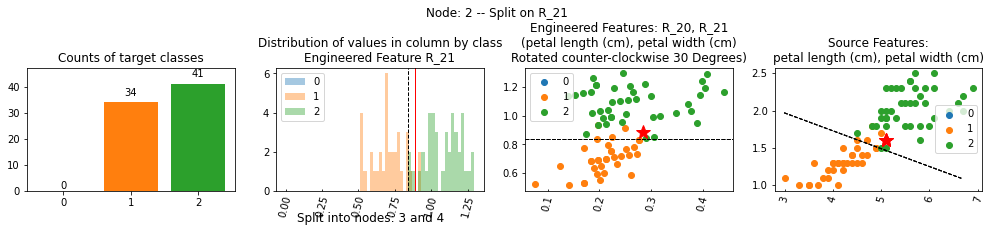

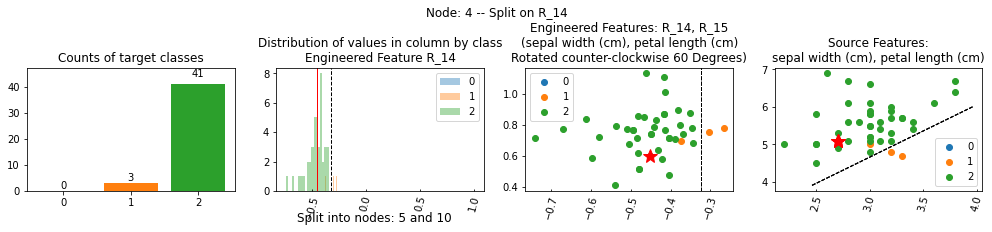

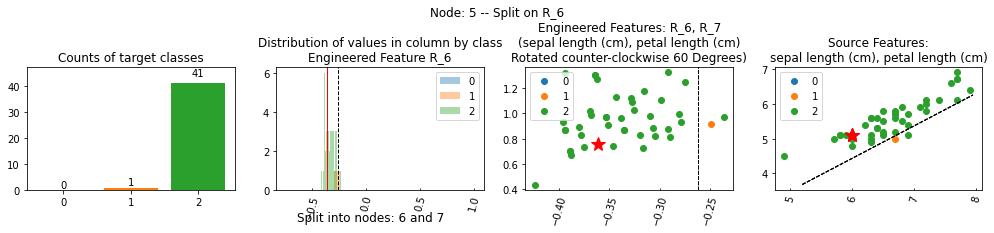

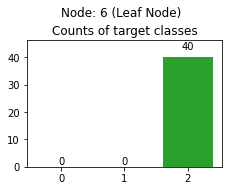

In [9]:
tree_viewer.graph_incorrect_rows(X_test_extended, y_test, y_pred, max_rows_shown=5)

## Visualize a full Decision Tree

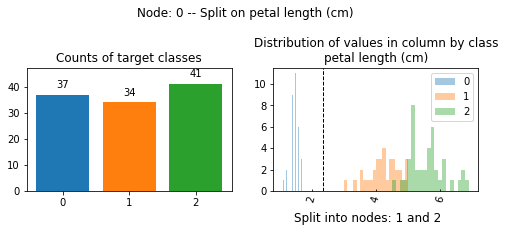

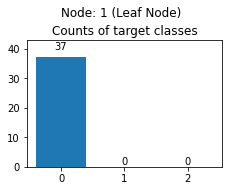

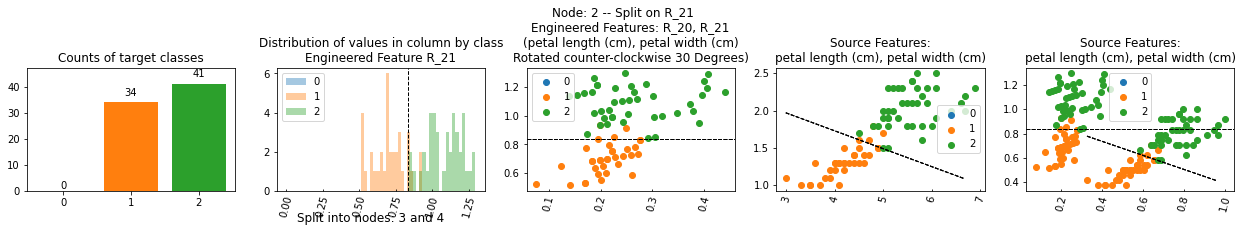

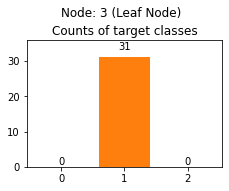

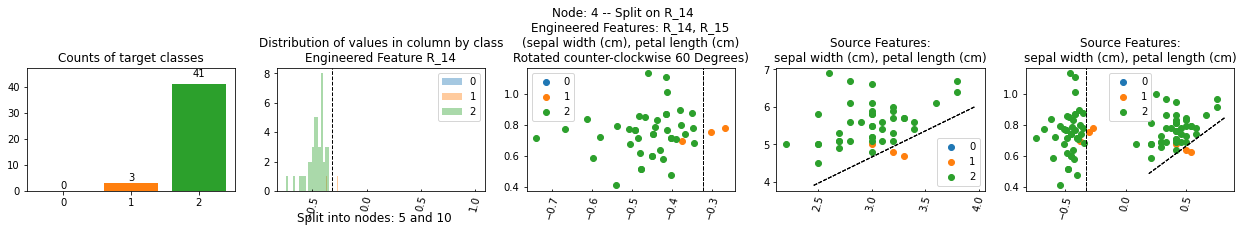

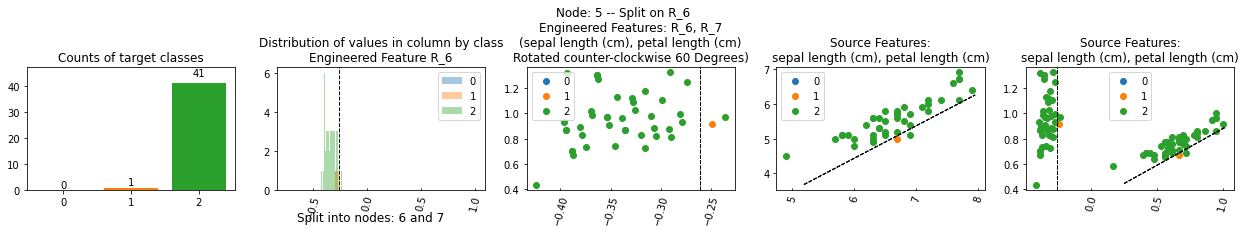

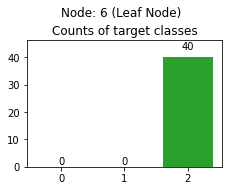

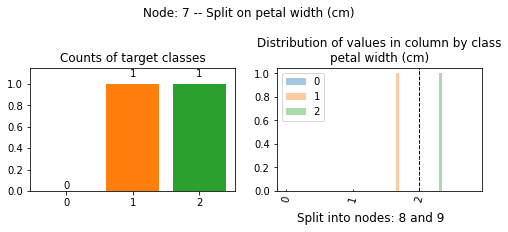

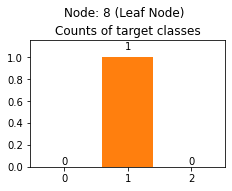

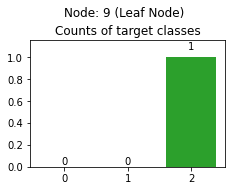

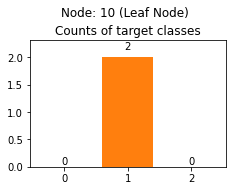

In [10]:
tree_viewer.graph_tree(show_log_scale=False, show_combined_2d_space=True)